In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/Gurgaon/Flats/properties_cleaned_v2.csv')

In [3]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_scores
0,house,malibu towne,sector 47,8.5,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,...,NaN,1600.0,NaN,0,0,0,0,0,0,99
1,house,international city by sobha phase 1,sector 109,12.0,20000.0,6000.0,Plot area 8000(743.22 sq.m.)Built Up area: 700...,5,6,3,...,NaN,7000.0,6000.0,1,1,0,0,0,0,154


## Basic Understanding of Data

In [4]:
df.shape

(3803, 23)

In [5]:
df.duplicated().sum()

126

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(3677, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3677 non-null   object 
 1   society              3676 non-null   object 
 2   sector               3677 non-null   object 
 3   price                3660 non-null   float64
 4   price_per_sqft       3660 non-null   float64
 5   area                 3660 non-null   float64
 6   areaWithType         3677 non-null   object 
 7   bedRoom              3677 non-null   int64  
 8   bathroom             3677 non-null   int64  
 9   balcony              3677 non-null   object 
 10  floor_num            3658 non-null   float64
 11  facing               2632 non-null   object 
 12  agePossession        3677 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1690 non-null   float64
 15  carpet_area          1872 non-null   f

### Column Data Types
1. Categorical ==== property_type, society, sector, bedRoom,bathroom, balcony, facing,agePossession, study room, servant room, pooja room, others, furnishing_type,
2. Numerical ===== price, price_per_sqft, area,floor_num super_built_up_area, built_up_area, carpet_area, luxury_scores
3. Mixed ========= areaWithType, 

## Categorical Column - Univariate Analysis

### property_type

In [9]:
df["property_type"].describe()

count     3677
unique       2
top       flat
freq      2818
Name: property_type, dtype: object

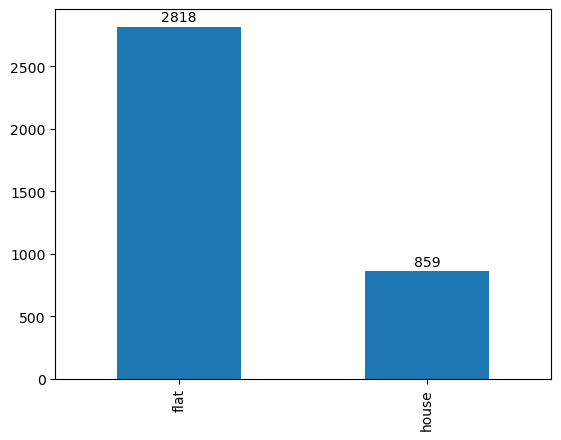

In [10]:
df.property_type.value_counts().plot(kind="bar")
for i, count in enumerate(df.property_type.value_counts()):
    plt.annotate(str(count), xy=(i, count+20), ha='center', va='bottom')
plt.show()

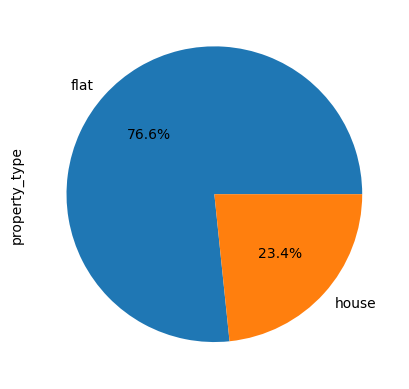

In [11]:
(df.property_type.value_counts(normalize=True)*100).plot(kind="pie", autopct="%.1f%%")
plt.show()

In [12]:
df.property_type.isnull().sum()

0

#### Observation
- flats are in majority(76.4%) and there are less number of houses(23.4%)
- no missing values

### Society

In [13]:
df["society"].describe()

count            3676
unique            676
top       independent
freq              486
Name: society, dtype: object

In [14]:
(486/3676)*100, df.society.value_counts()

(13.2208922742111,
 independent                                          486
 tulip violet                                          75
 ss the leaf                                           73
 shapoorji pallonji joyville gurugram                  42
 dlf new town heights                                  42
                                                     ... 
 kanchanjanga tower                                     1
 ninex city                                             1
 arjun marg/ sector- 26 phase- 1/ golf course road      1
 signature global rosellia                              1
 smartworld one dxp                                     1
 Name: society, Length: 676, dtype: int64)

In [15]:
df[df["society"] != "independent"]["society"].value_counts(normalize=True).cumsum().head(75)

tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
umang winter hills                      0.490282
indiabulls enigma                       0.494357
the close north                         0.498433
ireo the corridors                      0.502194
mvn athens                              0.505956
Name: society, Length: 75, dtype: float64

In [16]:
society_counts = df.society.value_counts()
frequency = {
     "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}

frequency

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

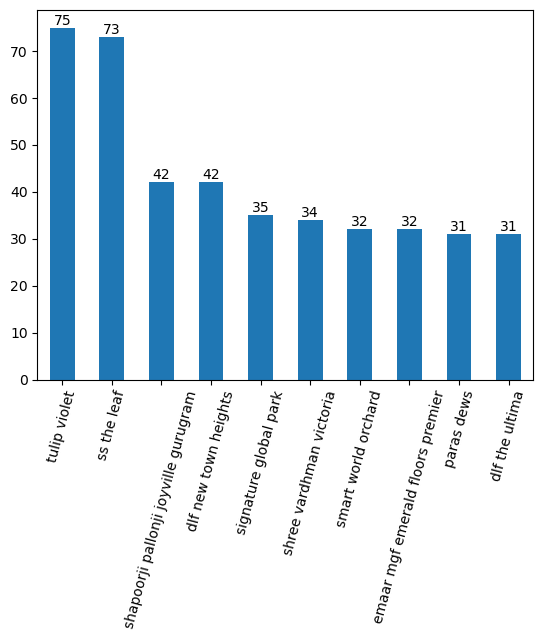

In [17]:
# top 10 societies
society_counts = df[df["society"] != "independent"]["society"].value_counts().head(10)
society_counts.plot(kind="bar")
for i, count in enumerate(society_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.xticks(rotation=75)
plt.show()

In [18]:
df.society.isnull().sum()

1

In [19]:
df[df.society.isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_scores
1181,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,1,0


#### Observations
- Around 13% properties comes under independent tag.
- There are 676 societies.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 601 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 273 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value
- lot of categoriesng value

### Sector

In [20]:
df.sector.describe()

count           3677
unique           120
top       sohna road
freq             166
Name: sector, dtype: object

In [21]:
df.sector.value_counts()

sohna road                     166
sector 85                      108
sector 102                     107
sector 92                      100
sector 69                       93
                              ... 
a block sushant lok phase 1      3
sector 88b                       3
b block sushant lok phase 1      3
sector 17a                       3
sector 37                        1
Name: sector, Length: 120, dtype: int64

In [22]:
df.sector.value_counts(normalize=True).cumsum().head(25)

sohna road    0.045145
sector 85     0.074517
sector 102    0.103617
sector 92     0.130813
sector 69     0.156106
sector 90     0.180310
sector 65     0.203971
sector 81     0.227631
sector 109    0.251020
sector 79     0.271689
sector 104    0.290454
sector 83     0.308948
sector 86     0.326353
sector 50     0.343758
sector 37d    0.360892
sector 95     0.377754
sector 107    0.394071
sector 108    0.410117
sector 89     0.425619
sector 56     0.440849
sector 48     0.455806
sector 70a    0.470492
sector 2      0.485178
sector 43     0.499048
sector 37c    0.512918
Name: sector, dtype: float64

In [23]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 24,
 'Average (10-49)': 65,
 'Low (2-9)': 27,
 'Very Low (1)': 1}

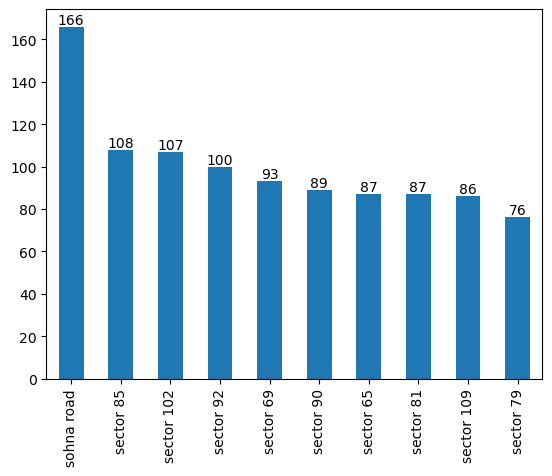

In [24]:
# top 10 sector
df.sector.value_counts().head(10).plot(kind="bar")
for i, count in enumerate(df.sector.value_counts().head(10)):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.show()

In [25]:
df.sector.isnull().sum()

0

#### Observations
- There are total 120 unique sector in the datasets
- The top 25 sector have 51 percent of the properties and the rest 49 percent of the properties come under the remaining 95 societies
- Frequency distribution of Sector
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 24 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 65 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 27 sectors have between 2 to 9 listings.
    - s.
Very Low (1): Interestingly, this only 1e no sectors with only 1 listing.

### BedRoom

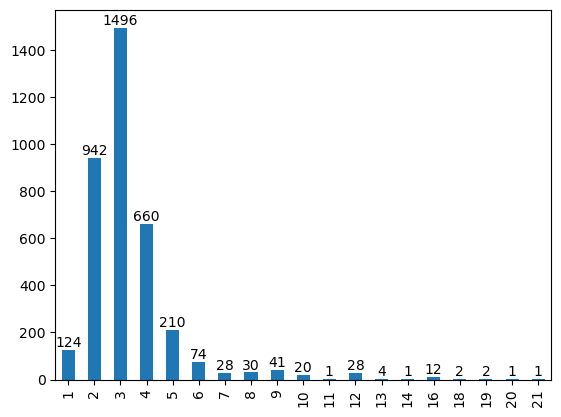

In [26]:
df.bedRoom.value_counts().sort_index().plot(kind="bar")
for i, count in enumerate(df.bedRoom.value_counts().sort_index()):
    plt.annotate(str(count), xy= (i, count), ha="center", va="bottom")
plt.show()

<Axes: ylabel='bedRoom'>

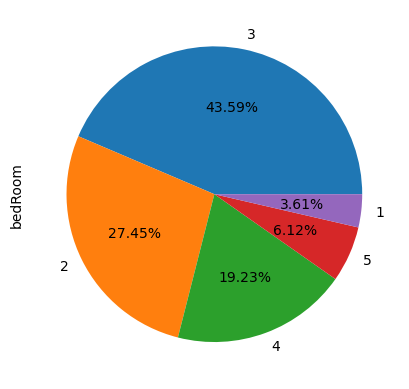

In [27]:
# top 5 categories
df.bedRoom.value_counts(normalize=True).head().plot(kind="pie", autopct="%.2f%%")

In [28]:
(df.bedRoom.value_counts(normalize=True)*100).head(10)

3     40.685341
2     25.618711
4     17.949415
5      5.711178
1      3.372314
6      2.012510
9      1.115039
8      0.815883
12     0.761490
7      0.761490
Name: bedRoom, dtype: float64

In [29]:
df.bedRoom.isnull().sum()

0

In [123]:
df.bedRoom.describe()

count    3677.000000
mean        3.360076
std         1.897629
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

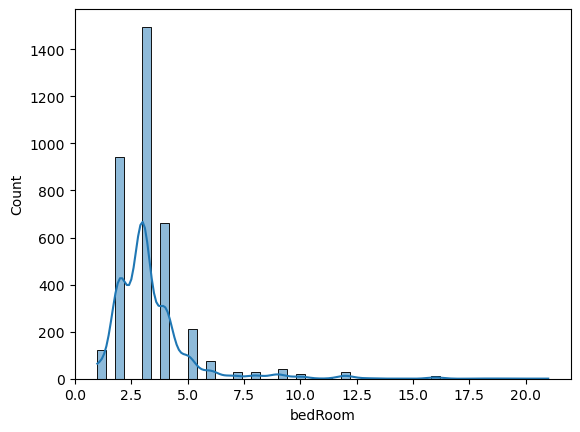

In [126]:
sns.histplot(df.bedRoom, kde=True)
plt.show()

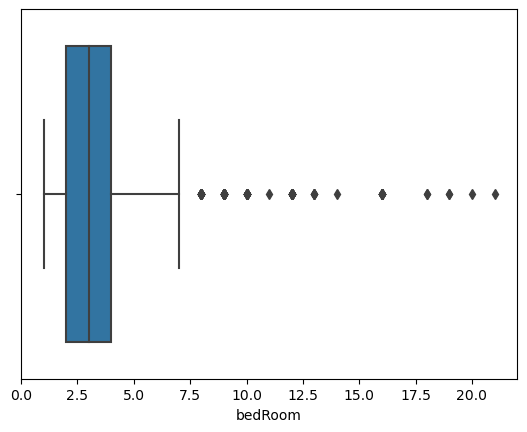

In [128]:
sns.boxplot(x=df.bedRoom)
plt.show()

In [129]:
df.bedRoom.quantile([.10,.20,.35,.60,.80,.90,.95])

0.10    2.0
0.20    2.0
0.35    3.0
0.60    3.0
0.80    4.0
0.90    5.0
0.95    6.0
Name: bedRoom, dtype: float64

#### Observation
- 40% property has 3 bedroom,25% has 2 bedroom and 17% has 4 bedroom. 82% property has one of these bedroom category
- quantile show that 95% properties have 6 or less than 6 bedrooms
- box plot shows that bedrooms greater than 8 may be outliers 

### Bathroom

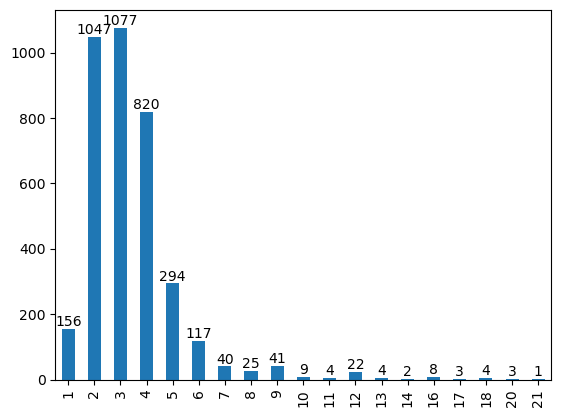

In [30]:
df.bathroom.value_counts().sort_index().plot(kind="bar")
for i, count in enumerate(df.bathroom.value_counts().sort_index()):
    plt.annotate(str(count), xy= (i, count), ha="center", va="bottom")
plt.show()

<Axes: ylabel='bathroom'>

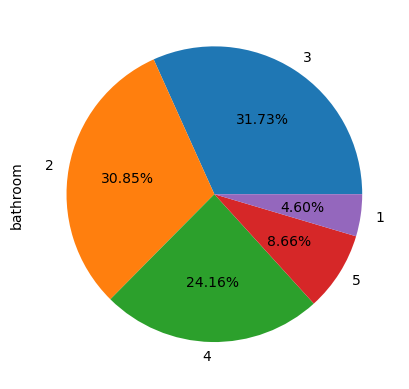

In [31]:
# top 5 categories
df.bathroom.value_counts(normalize=True).head().plot(kind="pie", autopct="%.2f%%")

In [32]:
(df.bathroom.value_counts(normalize=True)*100)

3     29.290182
2     28.474300
4     22.300789
5      7.995649
1      4.242589
6      3.181942
9      1.115039
7      1.087843
8      0.679902
12     0.598314
10     0.244765
16     0.217569
13     0.108784
18     0.108784
11     0.108784
20     0.081588
17     0.081588
14     0.054392
21     0.027196
Name: bathroom, dtype: float64

In [33]:
df.bathroom.isnull().sum()

0

#### Observation
- 29% properties has 3 bathrooms, 28% 2 and 22% has 4 bathrooms. 80% properties has one of these bathroom category
- there Maybe strong correlation between bedRoom and bathroom Columns as both have the same frequencyy

### Balcony

In [34]:
df.balcony.describe()

count     3677
unique       5
top         3+
freq      1172
Name: balcony, dtype: object

31.873810171335325


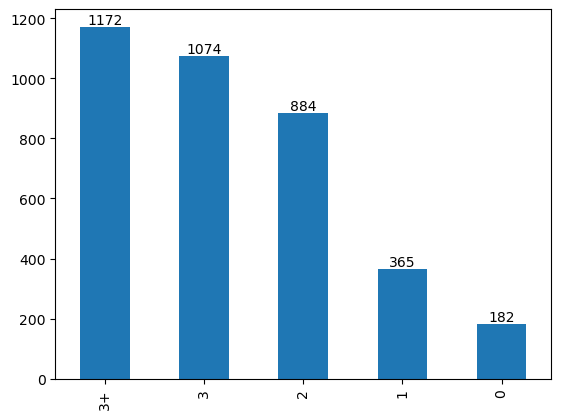

In [35]:
print((1172/3677)*100)
df.balcony.value_counts().plot(kind="bar")
for i, count in enumerate(df.balcony.value_counts()):
    plt.annotate(str(count), xy=(i,count), ha="center", va="bottom")
plt.show()

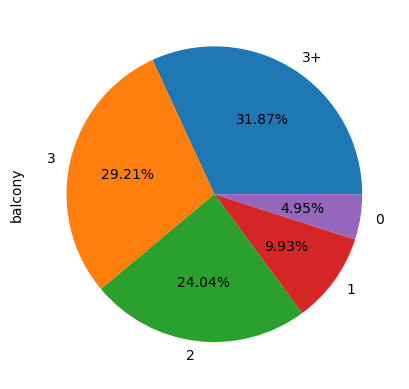

In [36]:
(df.balcony.value_counts(normalize=True)*100).plot(kind="pie", autopct="%.2f%%")
plt.show()

In [37]:
df.balcony.value_counts(normalize=True)*100

3+    31.873810
3     29.208594
2     24.041338
1      9.926571
0      4.949687
Name: balcony, dtype: float64

In [38]:
df.balcony.isnull().sum()

0

#### Observations
- about 32% has 3+ balcony, 29% has 3 balcony, 24% has 2 balcony

### Facing

In [39]:
df.facing.describe()

count           2632
unique             8
top       North-East
freq             623
Name: facing, dtype: object

23.670212765957448


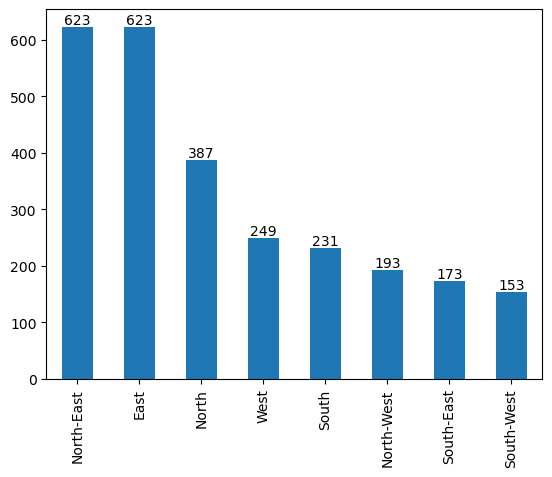

In [40]:
print((623/2632) *100)
df.facing.value_counts().plot(kind="bar")
for i, count in enumerate(df.facing.value_counts()):
    plt.annotate(str(count), xy=(i,count), ha="center", va="bottom")
plt.show()

In [41]:
null_values_facing = df.facing.isnull().sum()
null_values_facing = (null_values_facing/df.facing.shape[0])*100
print(f"There are {null_values_facing: .2f}% null values in facing column")

There are  28.42% null values in facing column


In [42]:
df.facing.value_counts(normalize=True)*100

North-East    23.670213
East          23.670213
North         14.703647
West           9.460486
South          8.776596
North-West     7.332827
South-East     6.572948
South-West     5.813070
Name: facing, dtype: float64

#### Observations
- There are about 29% missing values in facing columns
- In remaining values 23% properties are East and North-East facing each. 60% properties are in one of East, North-East, North direction

### Agepossession

In [43]:
df.agePossession.describe()

count               3677
unique                 6
top       Relatively New
freq                1646
Name: agePossession, dtype: object

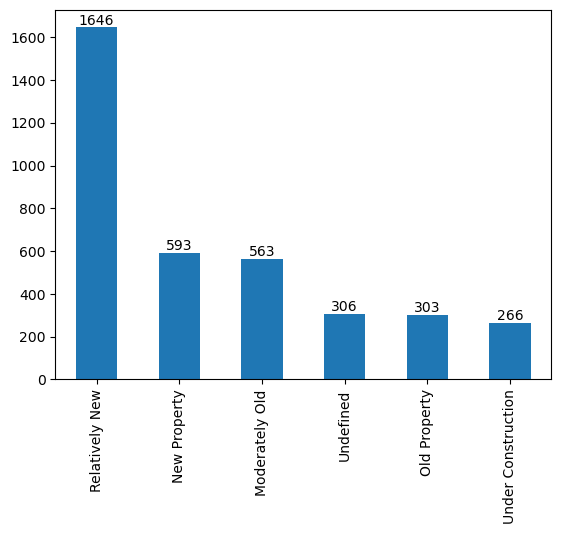

In [44]:
df.agePossession.value_counts().plot(kind="bar")
for i, count in enumerate(df.agePossession.value_counts()):
    plt.annotate(str(count), xy=(i,count), ha="center", va="bottom")
plt.show()

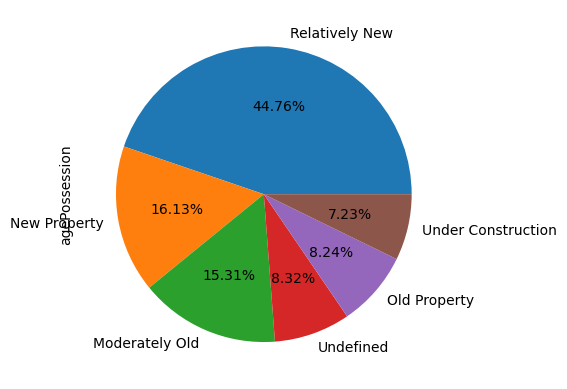

In [45]:
(df.agePossession.value_counts(normalize=True)*100).plot(kind="pie", autopct="%.2f%%")
plt.show()

In [46]:
(df.agePossession.value_counts(normalize=True)*100)

Relatively New        44.764754
New Property          16.127278
Moderately Old        15.311395
Undefined              8.322002
Old Property           8.240413
Under Construction     7.234158
Name: agePossession, dtype: float64

In [47]:
df.agePossession.isnull().sum()

0

#### Observations
- 60% properties are in new property category which means 60% properties are withing 5yrs.
- 44% properties are within 1-5 years
- 8.3% properites are undefined == need to handle
- 23.50% properties are more than 5year

### Furnishing type

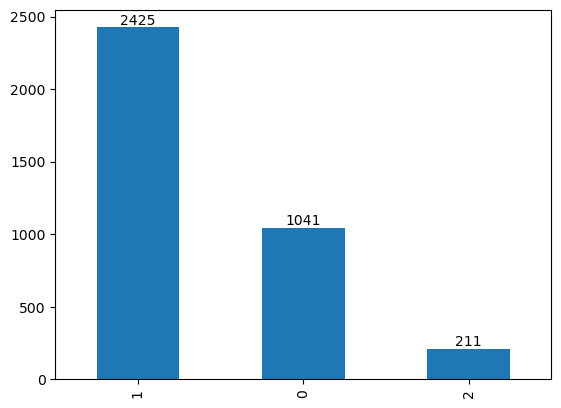

In [48]:
df.furnishing_type.value_counts().plot(kind="bar")
for i, count in enumerate(df.furnishing_type.value_counts()):
    plt.annotate(str(count), xy=(i,count), ha="center", va="bottom")
plt.show()

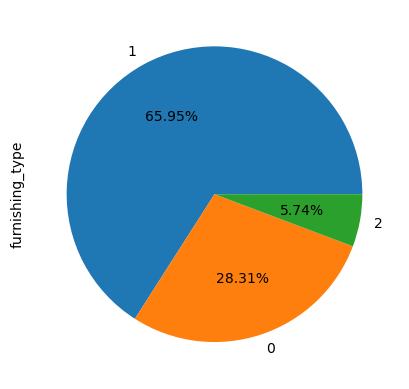

In [49]:
(df.furnishing_type.value_counts(normalize=True)*100).plot(kind="pie", autopct="%.2f%%")
plt.show()

In [50]:
df.furnishing_type.isnull().sum()

0

#### Observations

### Additional Rooms

In [51]:
df["study room"].isnull().sum(),df["servant room"].isnull().sum(),df["store room"].isnull().sum(),df["pooja room"].isnull().sum(), \
df["others"].isnull().sum()

(0, 0, 0, 0, 0)

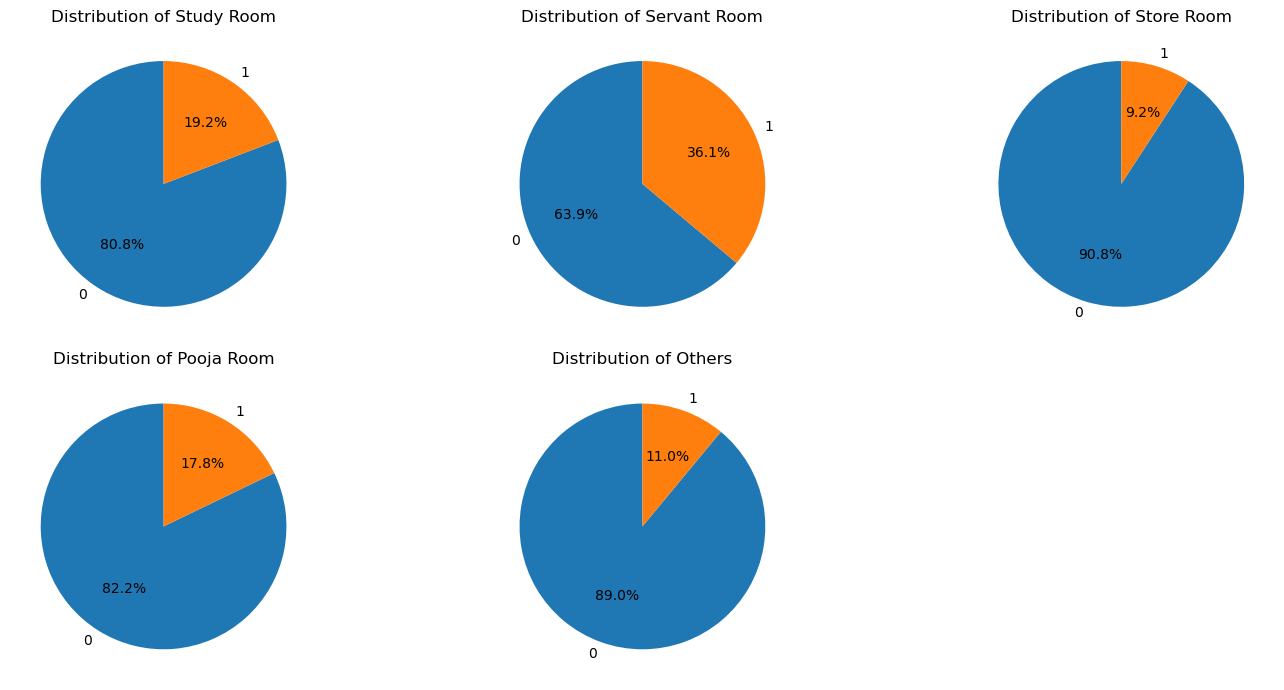

In [52]:
plt.figure(figsize=(15, 7))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], start=1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

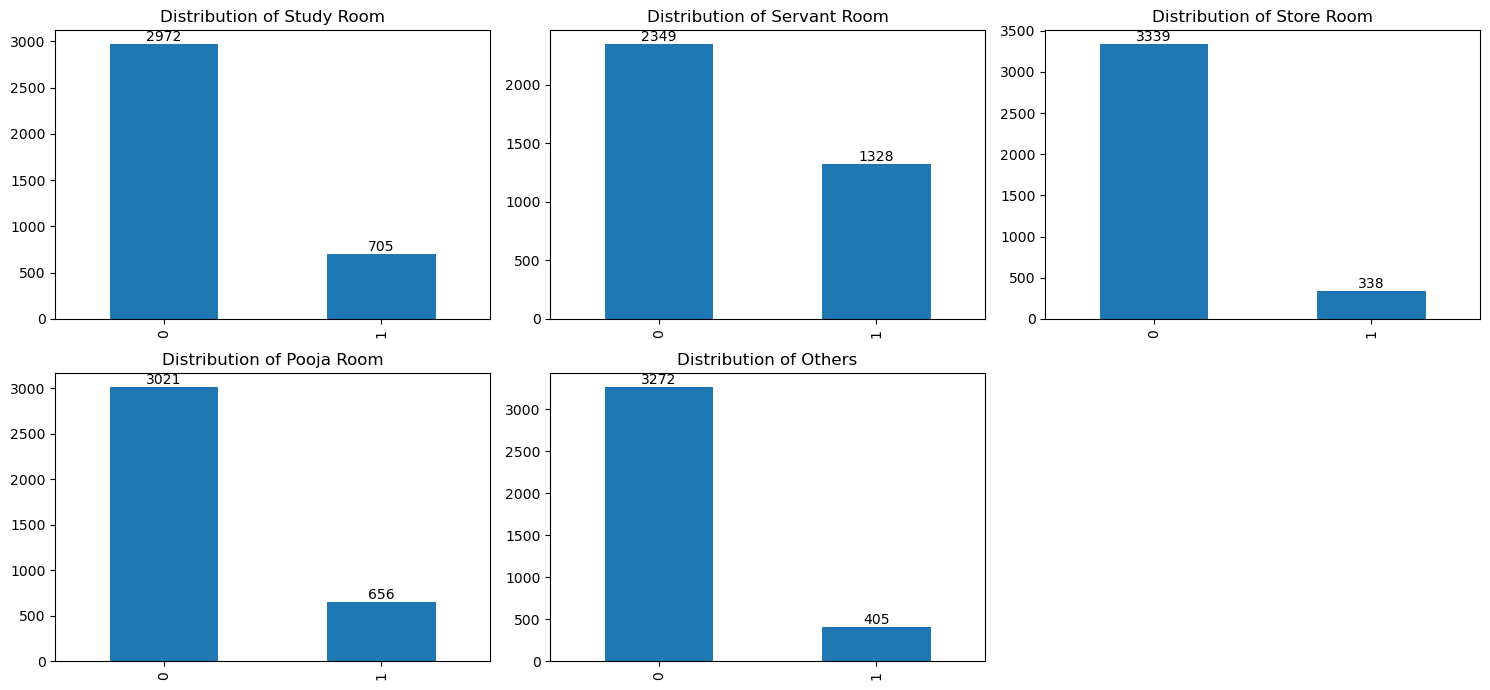

In [53]:
plt.figure(figsize=(15, 7))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], start=1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.bar(ax=ax)
    for i, count in enumerate(df[room].value_counts().sort_index()):
        plt.annotate(str(count), xy= (i, count), ha="center", va="bottom")
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

#### Observation
- 80% properties has study room, 64% has servant room, 91% has store room, 82% has pooja room and 89% properties has combination of other rooms

## Numerical Column - Univariate Analysis

### Price

In [54]:
df.price.isnull().sum(), df.price.describe()

(17,
 count    3660.000000
 mean        2.533664
 std         2.980623
 min         0.070000
 25%         0.950000
 50%         1.520000
 75%         2.750000
 max        31.500000
 Name: price, dtype: float64)

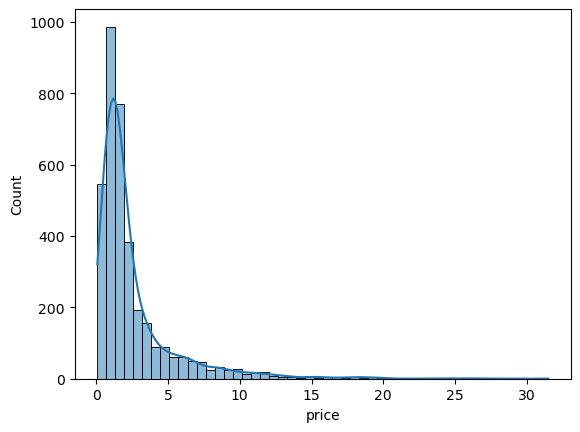

In [55]:
sns.histplot(df['price'], kde=True, bins=50)
plt.show()

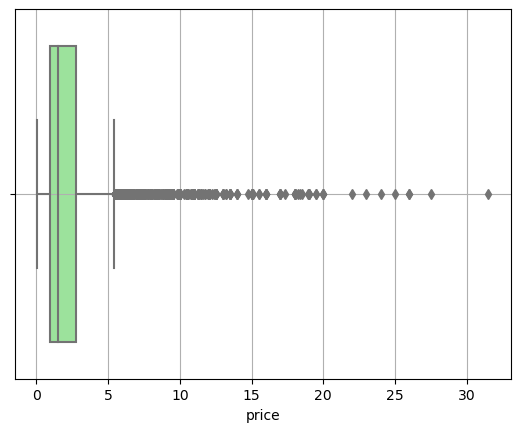

In [56]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

In [57]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()
print(f"skew: {skewness} and kurtosis: {kurtosis}")
print()

# Quantile Analysis
df.price.quantile([.01,.05,.95,.99])

skew: 3.2791704733134615 and kurtosis: 14.933372629214254



0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

In [58]:
# identifying outliers
Q1 = df.price.describe()["25%"]
Q3 = df.price.describe()["75%"]
IQR = Q3 - Q1

print(f"inter quartile range: {IQR}")

lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

print(f"lower bound ==> {lower_range} and upper bound ==> {upper_range}")

inter quartile range: 1.8
lower bound ==> -1.7500000000000002 and upper bound ==> 5.45


In [59]:
outliers = df[(df['price'] < lower_range) | (df['price'] > upper_range)]
outliers.shape

(425, 23)

In [60]:
outliers.price.describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

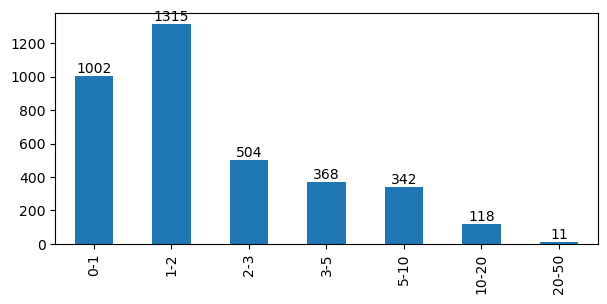

In [61]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]

price_bins = pd.cut(df.price,  bins=bins,labels=bin_labels,right=False).value_counts().sort_index()
price_bins.plot(kind="bar", figsize=(7,3))
for i, count in enumerate(price_bins):
    plt.annotate(str(count), xy=(i,count), ha="center", va="bottom")
plt.show()

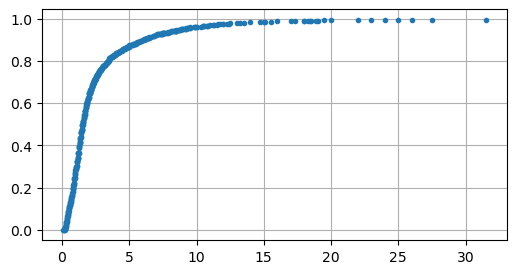

In [62]:
# ecdf plot
ecdf = df.price.value_counts().sort_index().cumsum()/len(df.price)
plt.figure(figsize=(6,3))
plt.plot(ecdf.index, ecdf, marker=".", linestyle="none")
plt.grid()

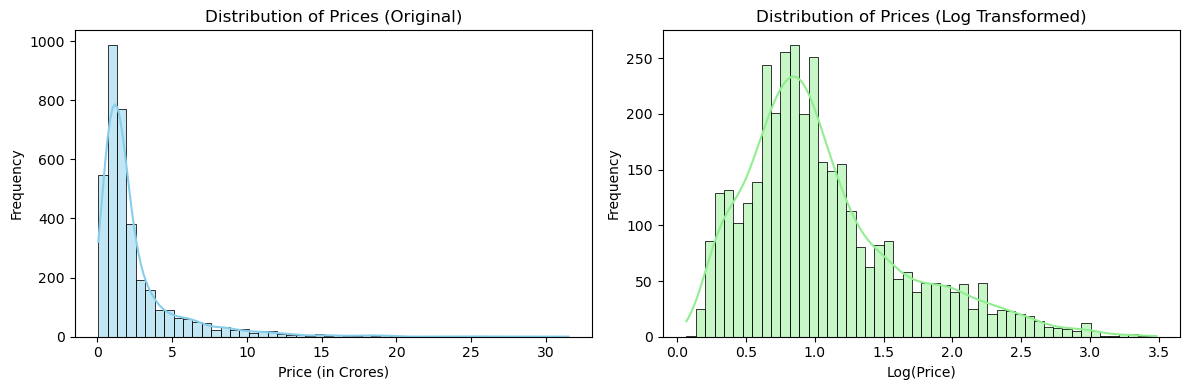

In [63]:
plt.figure(figsize=(12, 4))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

we used np.log1p(x) in place of np.log(x) because: This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.
Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [64]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255315 0.9646692415449265


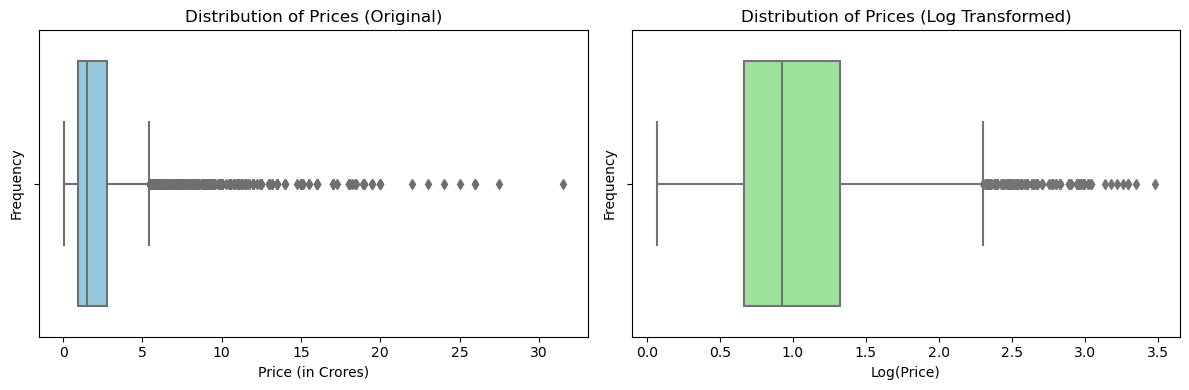

In [65]:
plt.figure(figsize=(12, 4))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Observations
- **Descriptive Statistics**:-
    - There are 3,660 non missing values
    - Mean Price: The avg price is approximately 2.53 crore
    - Median Price: The median(50 percentile) price is approx 1.52 crore
    - Standard Deviation: standard deviation of 2.98 crore, this indicates variability in price
    - Range: price ranges from  min of .07 crore to max of 31.50 crore
    - IQR: interquitile range from .95 crore to 2.75 crore
- **Visualization**:-
    - **histogram**:-
        - histogram shows that most properties are priced lower (less than 5 crore) and very few properties are above 10 crore
    - **Boxplot**:-  T
        - he box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot. but this need to be carefully examined
- **Skewness**:-
    - The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution           tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the          lower end with a few high-priced properties.
- **Kurtosis**:-
    - The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and          more outliers compared to a normal distribution.
- **Quantile**:-
    - only 1% properties are below 25lac, 5% properties are below 37lac, 95% below 8.50 crore and 99% below 15.26 crore, this means that very few properties are above 15 crore.
- **Outliers Analysis**:-
    - based on IQR method there are 425 properties considered as outliers
    - these outliers has average price of 9.23 crore
    - these outliers are ranges from 5.46 crore to 31.50 crore
- **Price Binning**:-
    - majority or properties are price between 0-2 crore
    - there is significant drop in properties above 5 crore
- There are 17 missing values
- After the log transformation to price column we got lower kurtosis and also skew got reduced and in boxplot of both before and after transformation showing that there are very less outliers compare to those before transformation

### Price_per_sqft

In [66]:
df.price_per_sqft.isnull().sum()

17

In [67]:
df.price_per_sqft.describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

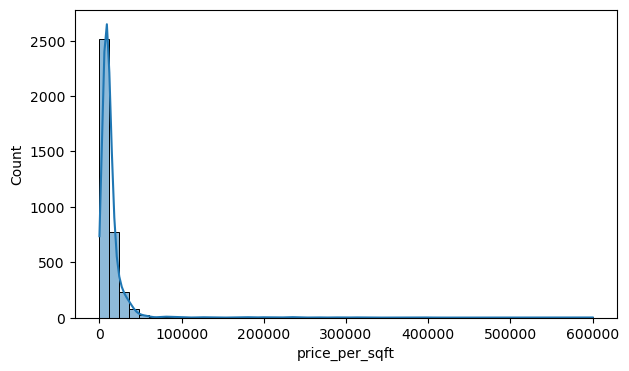

In [68]:
plt.figure(figsize=(7,4))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.show()

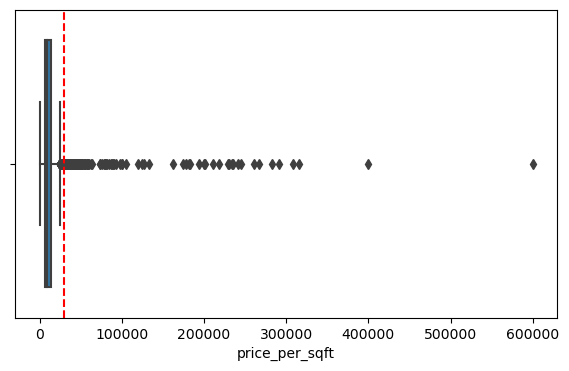

In [69]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['price_per_sqft'])
plt.axvline(x=30000, linestyle="--", color="red")
plt.show()

In [70]:
skew_price_per_sqft = df.price_per_sqft.skew()
kurtosis_price_per_sqft = df.price_per_sqft.kurt()
skew_price_per_sqft, kurtosis_price_per_sqft

(11.437190426237105, 186.92801323532882)

In [71]:
# quantile analysis
df.price_per_sqft.quantile([.05,.10,.20,.35,.50,.65,.80,.95, .99])

0.05     4715.95
0.10     5463.00
0.20     6440.60
0.35     7788.30
0.50     9020.00
0.65    11363.00
0.80    15298.60
0.95    33333.00
0.99    85052.47
Name: price_per_sqft, dtype: float64

In [72]:
# identifying outliers
Q1 = df.price_per_sqft.describe()["25%"]
Q3 = df.price_per_sqft.describe()["75%"]
IQR = Q3 - Q1

print(f"inter quartile range: {IQR}")

lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

print(f"lower bound ==> {lower_range} and upper bound ==> {upper_range}")

outliers = df[(df['price_per_sqft'] < lower_range) | (df['price_per_sqft'] > upper_range)]
outliers.shape

inter quartile range: 7063.25
lower bound ==> -3777.625 and upper bound ==> 24475.375


(354, 23)

#### Observations
- **Discriptive Statistics**:-
    - mean price_per_sqft is 13892, median is 9020, standard deviation of 23210 which is very high
    - pricer_per_sqft has range from 4 to 6000000 and IQR is from 6817 to 13820
- **Visualization**:-
    - **histogram**:-
        - the histogram indicates the most of the properties are price_per_sqft below 30000 and very little properties above it and           a few properties having exceptionally high price_per_sqft.
    - **Boxplot**:-
        - The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively             compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers
- **Skewness**:-
    - very high skew(11.44) indicating right skewed
- **Kurtosis**:-
    - very high kurtosis indicating that there are lot of outliers in the column
- **Quantile Analysis**:-
    - clearly quantile are showing that 95% value are less that 33000 and 99% values are less than 85000 so values after 35000 need to be examined carefully if this is important column for our ml model
- 17 missing values

### Floornumber

In [73]:
df.floor_num.isnull().sum(), df.floor_num.describe()

(19,
 count    3658.000000
 mean        6.798250
 std         6.012454
 min         0.000000
 25%         2.000000
 50%         5.000000
 75%        10.000000
 max        51.000000
 Name: floor_num, dtype: float64)

<Axes: >

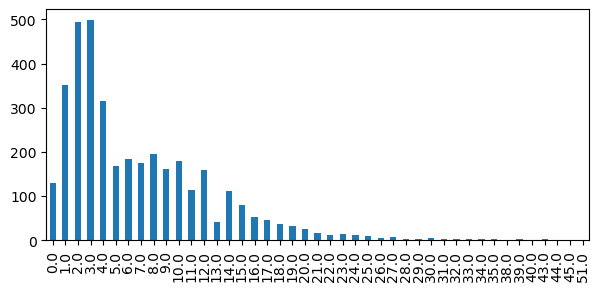

In [74]:
df['floor_num'].value_counts().sort_index().plot(kind='bar', figsize=(7,3))

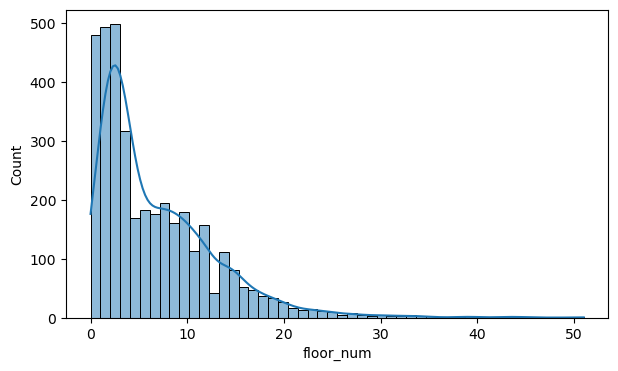

In [75]:
plt.figure(figsize=(7,4))
sns.histplot(df['floor_num'], bins=50, kde=True)
plt.show()

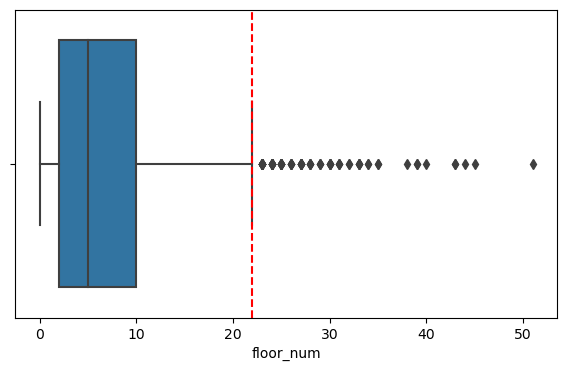

In [76]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['floor_num'])
plt.axvline(x=22, linestyle="--", color="red")
plt.show()

#### Observations
- majority of properties lie between ground floor(0) and the 22th floor
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.
- 19 missing valuesal 

### Areas

#### Super_built_up area

In [77]:
df.super_built_up_area.isnull().sum(),df.super_built_up_area.describe()

(1802,
 count     1875.000000
 mean      1925.237627
 std        764.172177
 min         89.000000
 25%       1479.500000
 50%       1828.000000
 75%       2215.000000
 max      10000.000000
 Name: super_built_up_area, dtype: float64)

In [78]:
df.super_built_up_area.quantile(.90)

2800.0

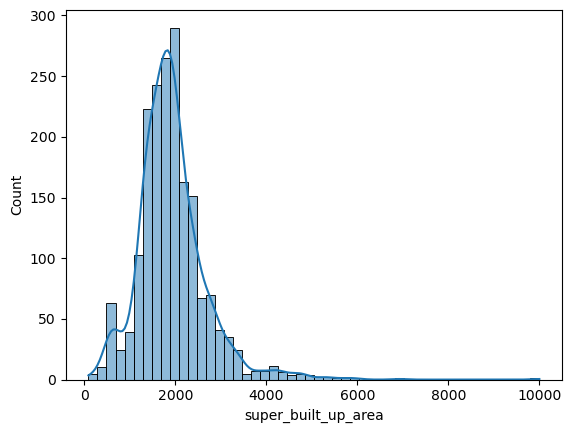

In [79]:
sns.histplot(df.super_built_up_area,bins=50, kde=True)
plt.show()

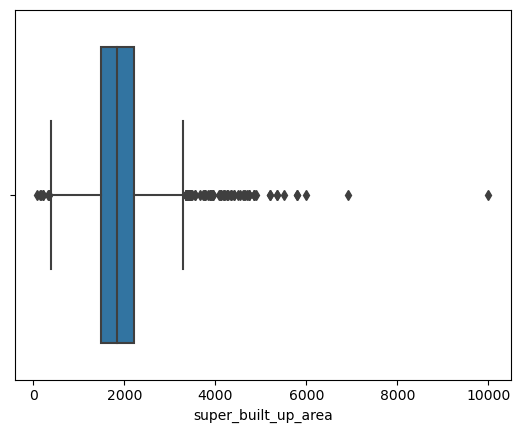

In [80]:
sns.boxplot(x=df.super_built_up_area)
plt.show()

##### Observations
- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.
- 90% of properties has super_built up area of 2800 so above this value we have to examine these values as they could be outliers or data mistakes
- 1802 values are missing which means aproximately 50% values are missing

#### Built_up area

In [81]:
df.built_up_area.isnull().sum(),df.built_up_area.describe()

(1987,
 count      1690.000000
 mean       2379.585816
 std       17942.880237
 min           2.000000
 25%        1100.000000
 50%        1650.000000
 75%        2400.000000
 max      737147.000000
 Name: built_up_area, dtype: float64)

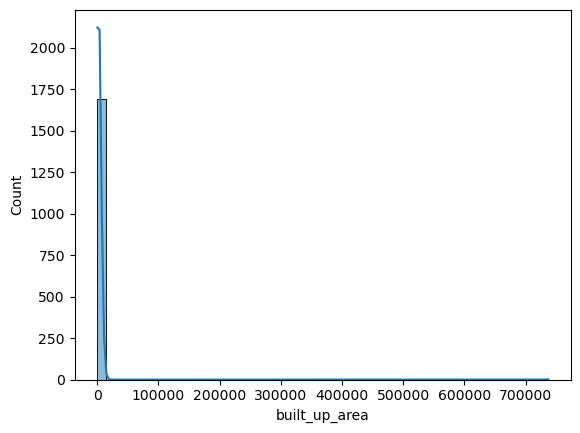

In [82]:
sns.histplot(df.built_up_area,bins=50, kde=True)
plt.show()

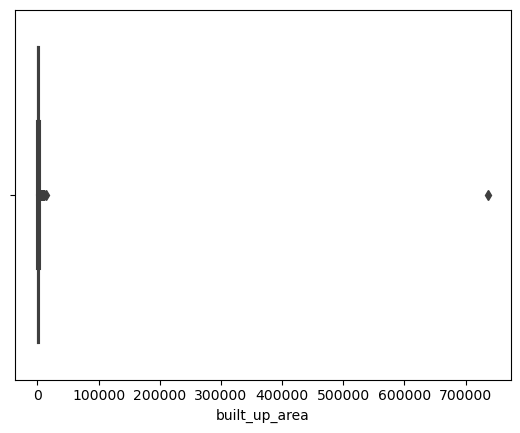

In [86]:
sns.boxplot(x=df.built_up_area)
plt.show()

In [87]:
df.built_up_area.skew(), df.built_up_area.kurt()

(40.70657243336599, 1667.870389604575)

In [90]:
df.built_up_area.quantile([.05,.10,.30,.45,.60,.80,.90,.95,.99])

0.05     240.45
0.10     480.00
0.30    1234.80
0.45    1550.00
0.60    1870.80
0.80    2684.00
0.90    3600.00
0.95    4691.00
0.99    7455.50
Name: built_up_area, dtype: float64

In [97]:
q1 = df.built_up_area.describe()['25%']
q3 = df.built_up_area.describe()['75%']

iqr = q3 - q1
print(iqr)

1300.0


In [101]:
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

print(lower_range,"==" ,upper_range)

-850.0 == 4350.0


In [105]:
df[(df.built_up_area < lower_range) |(df.built_up_area > upper_range)].shape

(127, 23)

##### Observations
- Most properties have a build up are ranging form 500 sq.ft to 3600 sq.ft
- There are very few properties with large build up area leading a very highly right skewed distribution, even we can see it like a bar
- the box plot confirms that there are significant outliers in the column. The inter quartile range is very compacted and also the whisker of the box plots are very stretched because of these outliers. We can seee from boxplot the outliers in the higher side of the data
- The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.
- 1987 missing values in this column

#### Carpet Area

In [106]:
df.carpet_area.isnull().sum(), df.carpet_area.describe()

(1805,
 count      1872.000000
 mean       2529.179507
 std       22799.836449
 min          15.000000
 25%         843.000000
 50%        1300.000000
 75%        1790.000000
 max      607936.000000
 Name: carpet_area, dtype: float64)

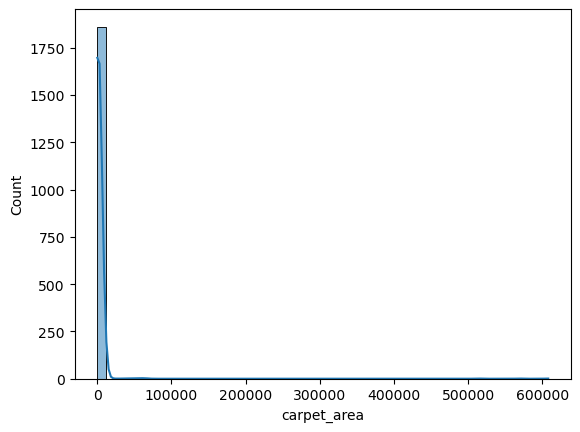

In [107]:
sns.histplot(df.carpet_area,bins=50, kde=True)
plt.show()

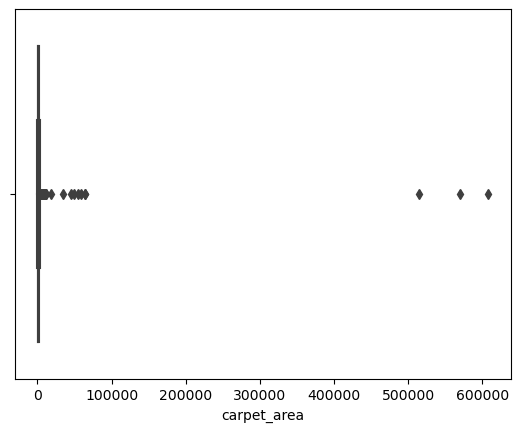

In [111]:
sns.boxplot(x=df.carpet_area)
plt.show()

In [113]:
df.carpet_area.skew(), df.carpet_area.kurt()

(24.333239092845265, 604.5376354886155)

In [114]:
df.carpet_area.quantile([.05,.10,.30,.45,.60,.80,.90,.95,.99])

0.05     350.0
0.10     501.0
0.30     965.0
0.45    1200.0
0.60    1450.0
0.80    1925.0
0.90    2399.8
0.95    2950.0
0.99    6859.5
Name: carpet_area, dtype: float64

##### Observations
- Most properties have a carpet area ranges from 500 sq.ft to 2900 sq.ft
- histogram show that the distribution is right skewed as there are very few values in the larger side
- iqr and whisker of boxplots are very compacted this indicates that there are potential outliers or errors in the upper side
- values greater that 3000 need to be further investigation as 95% values are below this
- 1805 missing values

### Luxury Score

In [115]:
df.luxury_scores.describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_scores, dtype: float64

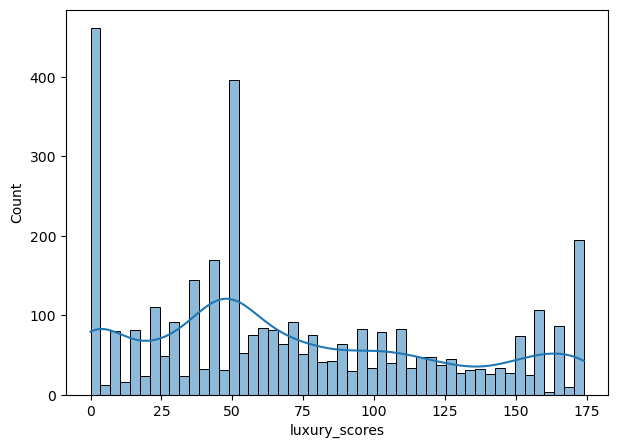

In [118]:
plt.figure(figsize=(7,5))
sns.histplot(df.luxury_scores, bins=50, kde=True)
plt.show()

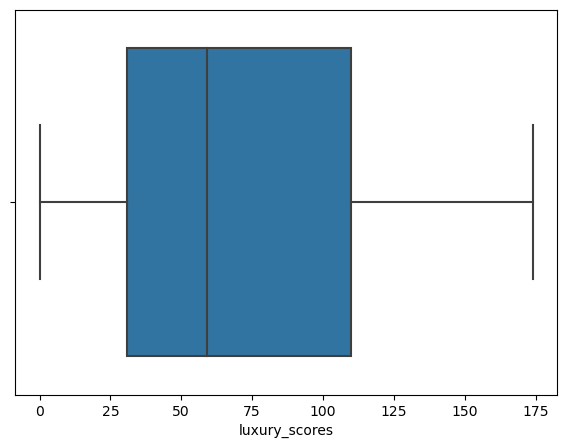

In [119]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df.luxury_scores)
plt.show()

In [120]:
df.luxury_scores.isnull().sum()

0

#### Observations
- The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range
- most of the properties has luxury score between 30 and 110. The interquartile range fall betwee these values